<a href="https://www.kaggle.com/code/hashemi221022/house-price-prediction-regression-base?scriptVersionId=142476028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center style="font-family:newtimeroman;font-size:150%; border-radius:50px; padding: 20px; color: #FF00FF; background-color: black"> House price prediction with (XGBoost | CatBoost | Ridge | Bayesian Ridge | Huber | ExtraTrees | KNeighbors | RandomForest )</center></h1>
<center><img style="border-radius: 20px 20px 20px 20px" src='https://images.adsttc.com/media/images/5bd2/605f/f197/ccd6/5300/0227/large_jpg/tehran.jpg?1540513882' height=500px width=900px border-radius=55%></center><br>

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color= white >About Tehran:</font></h3>
    
<p><font color=#FF00FF>
Tehran is the capital of Iran, in the north of the nation. Its central Golestan Royal residence complex, with its lavish rooms and marble position of authority, was the situation of control of the Qajar line. The National Adornments Exhibition Hall holds numerous of the Qajar monarchs’ gems, whereas the National Historical Center of Iran has artifacts dating back to Paleolithic times. The Milad Tower offers all encompassing sees over the city. 
    
The 7 columns of house features are :
<font color='#00FF00'>
        <ol >
            <li>Area: Area in square meters</li>
            <li>Bedroom: Number of bedrooms</li> 
            <li>Parking: Has Parking or not</li> 
            <li>Elevetor: Has elevator or not</li> 
            <li>Warehouse: Has warehouse or not</li> 
            <li>Address: The region where the house is placed</li>
            <li>Price:  in Toman and USD</li>      
       </ol>
 </font>
</font></p>

 <center><button type="button"><a href="/kaggle/input/house-price-tehran-iran/housePrice.csv">House Price Data</a></button><center
                                                                           

  



# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import library</p>

In [1]:
# library for filter warnings
import warnings
warnings.filterwarnings('ignore')

# Library for visualization
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Extera library for time recording and manipulation in the data column
import re
import time

# Library for preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Library for analysis Score & error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Library for hyperparameter 
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Library for create MODELs
from sklearn.linear_model import  HuberRegressor, Ridge, BayesianRidge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Library for save the best model
import joblib


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">2. The Second Step | preparing Dataset</p>

In [2]:
# Read dataset
df = pd.read_csv('/kaggle/input/house-price-tehran-iran/housePrice.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
# geting describe for check dataset up(numerical)
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [4]:
# geting describe for check dataset up(object and categorical)
df.describe(exclude=['int','float'])

,Area,Parking,Warehouse,Elevator,Address
count,3479,3479,3479,3479,3456
unique,243,2,2,2,192
top,75,True,True,True,Punak
freq,111,2950,3182,2739,161


In [5]:
# geting info and check the Dtype and Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
## Checking the data to find missing values
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

<h1>Dataset Problems</h1>
<ol>
    <li>The first problem is that the area column is a number, but it was assigned to the object format.</li>
    <li>Boolean data should be converted to numeric data</li>
    <li>The address column data must also be encoded</li>
    <li>In the address column, we have 23 missing values, which can be ignored due to their small number.</li>
    <li>The dollar price is not updated</li>
</ol>

In [7]:
# Solving probelem of a Area culomn
df['Area'] = df['Area'].apply(lambda object_to_num: re.sub(',', '', object_to_num))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [8]:
# encodind address column
address_dummy = pd.get_dummies(df['Address'])
df = df.merge(address_dummy, left_index = True, right_index = True)
# Remove Address column
df.drop(columns = 'Address', inplace = True)

In [9]:
# geting all of columns
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Price(USD)', 'Abazar', 'Abbasabad', 'Absard',
       ...
       'Waterfall', 'West Ferdows Boulevard', 'West Pars', 'Yaftabad',
       'Yakhchiabad', 'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh',
       'Zibadasht'],
      dtype='object', length=199)

In [10]:
# converting boolean to int
boolean_features = df.columns[2:]
df[boolean_features] = df[boolean_features].astype('int64')

In [11]:
# Removing missing values
df.dropna(inplace=True)

In [12]:
# Removing column of Dollor price
df = df.drop(columns = ['Price(USD)'])


In [13]:
# Check removing missing values & USD column, adding encoding address, converting area, parking,warehouse & elevator from boolean to int
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
count,3.479000e+03,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3479.000000,3479.000000,3479.000000,3479.000000,...,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000,3479.000000
mean,8.744000e+06,2.079908,0.847945,0.914631,0.787295,5.359023e+09,0.006611,0.000575,0.001725,0.000862,...,0.000862,0.041679,0.003162,0.000862,0.000287,0.010923,0.002874,0.007761,0.001150,0.000287
std,3.167266e+08,0.758275,0.359126,0.279471,0.409279,8.099935e+09,0.081051,0.023973,0.041499,0.029357,...,0.029357,0.199883,0.056149,0.029357,0.016954,0.103954,0.053544,0.087766,0.033893,0.016954
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,3.600000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900000e+01,2.000000,1.000000,1.000000,1.000000,1.418250e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000e+01,2.000000,1.000000,1.000000,1.000000,2.900000e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.200000e+02,2.000000,1.000000,1.000000,1.000000,6.000000e+09,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.616000e+10,5.000000,1.000000,1.000000,1.000000,9.240000e+10,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">2_1. Visualization Dataset </p>

<h1>Finding a Remove outlier</h1>
<p>With visualization, outliers can be easily found in features</p>

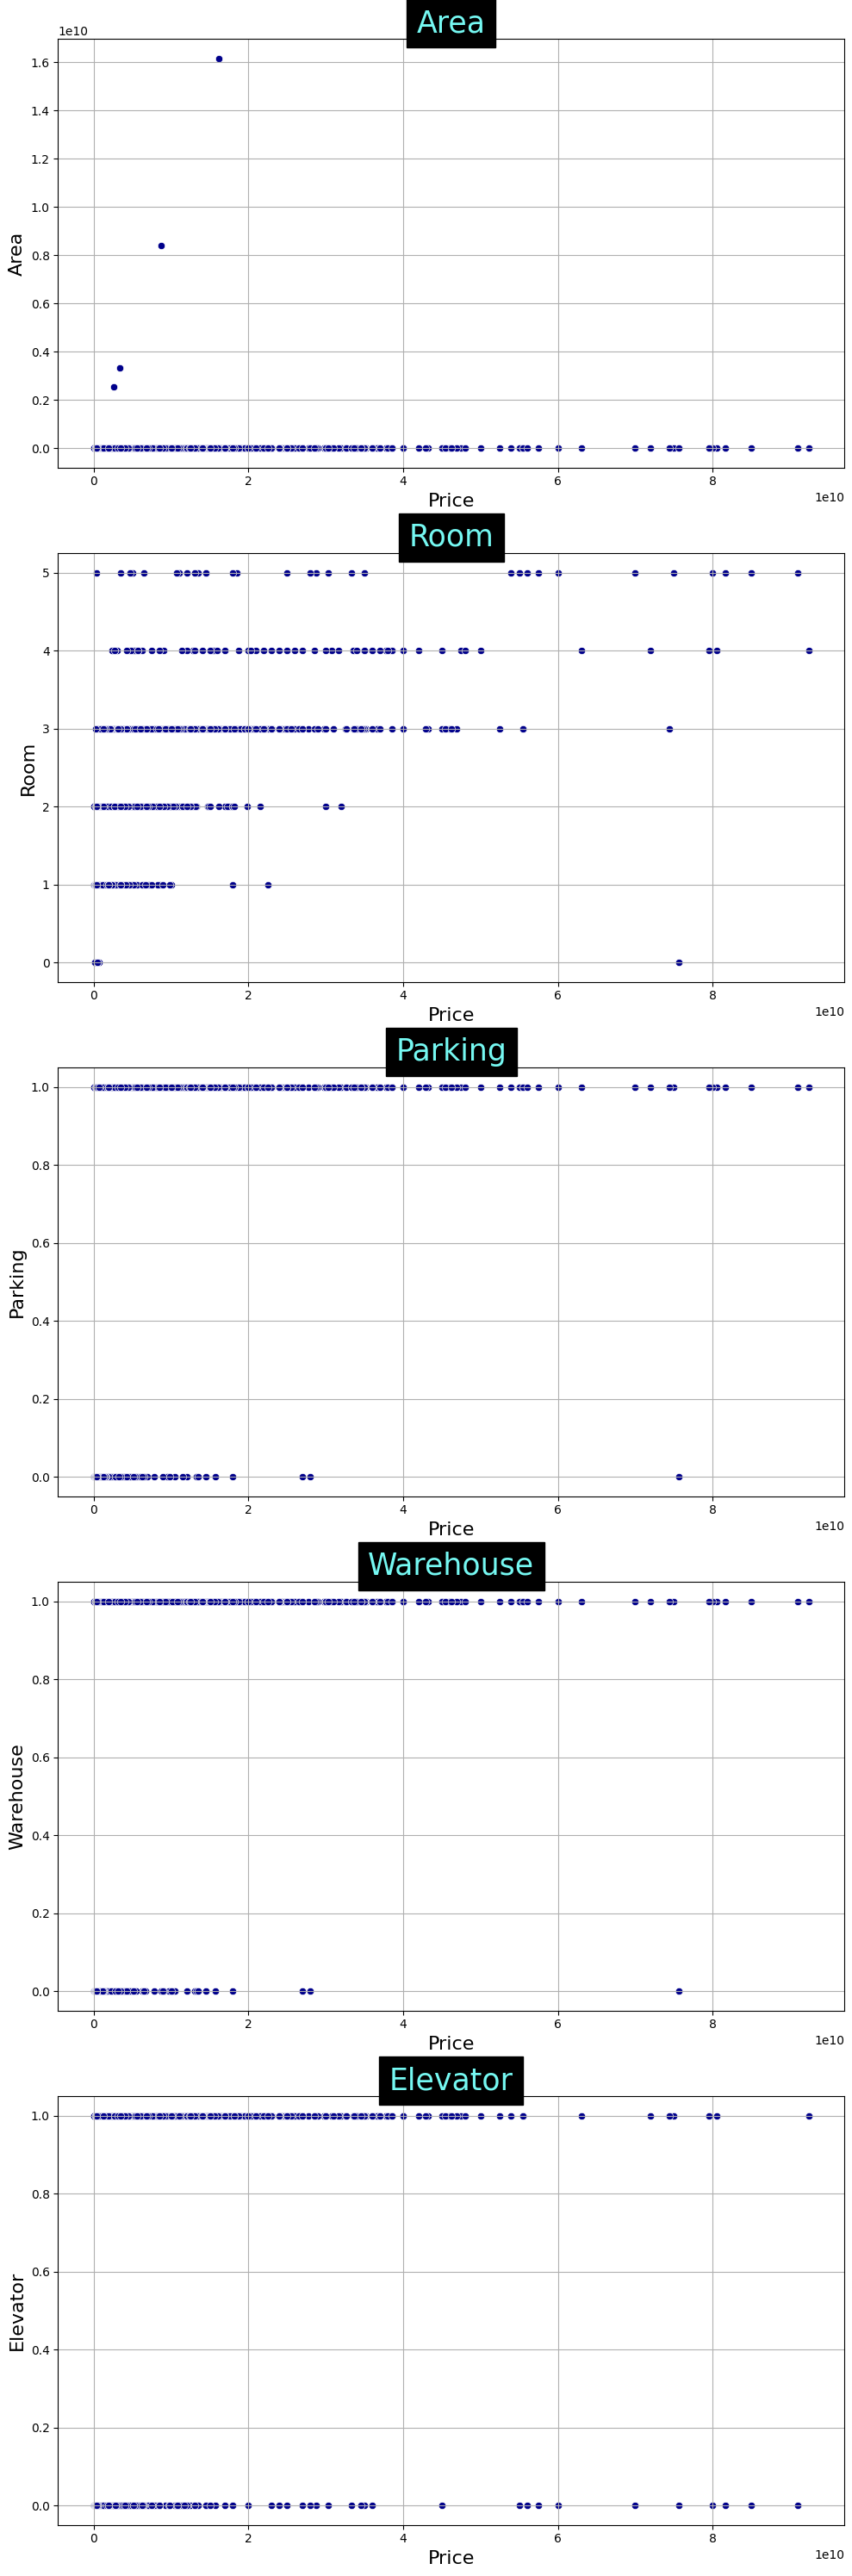

In [15]:
# checking the scatter plot to find outliers
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
sns.set_palette("PiYG")
plt.figure(figsize=(10,30))
for idx, column in enumerate(features):
    plt.subplot(5, 1,  idx + 1)
    sns.scatterplot(x = df['Price'], y=df[column] , data = df, color='darkblue')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('Price', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()


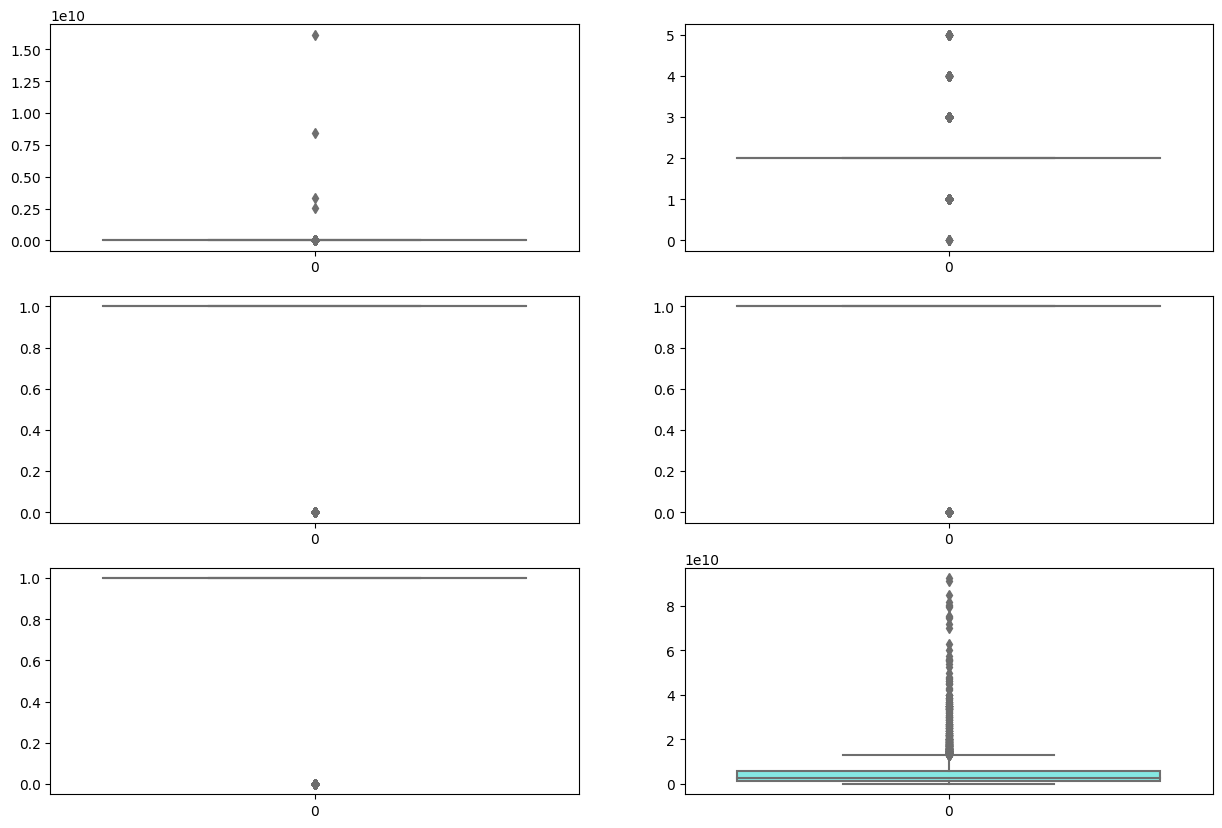

In [16]:
# Subplot for better finding outlier
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']
fig  = plt.subplots(nrows = 2, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(3,2,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()

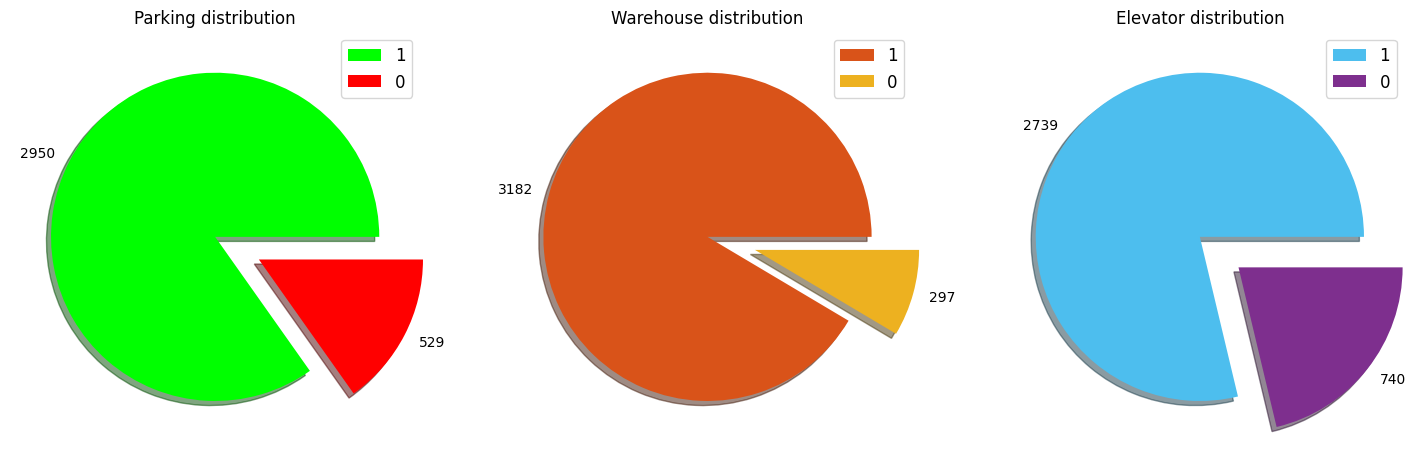

In [17]:
# showing that the house has a parking, warehouse and elevator or not(has=1, has not=0)
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#00FF00', '#FF0000'], ['#D95319', '#EDB120'], ['#4DBEEE', '#7E2F8E']]
explode = [0, 0.3]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title(f'{columns[i]} distribution')

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">2_2. Find & Remove Outliers</p>

In [18]:
# creating fanction to finding outlier of lower and upper in dataset
def lower_and_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

area_lower, area_upper = lower_and_upper(df['Area'])
price_lower, price_upper = lower_and_upper(df['Price'])

print(f"Lower limit for area: {area_lower:0.3f}")
print(f"Upper limit for area: {area_upper:0.3f}")
print(f"Lower limit for price: {price_lower:,}")
print(f"Upper limit for price: {price_upper:,}")

Lower limit for area: -7.500
Upper limit for area: 196.500
Lower limit for price: -5,454,375,000.0
Upper limit for price: 12,872,625,000.0


In [19]:
# Finding the number and index of outliers in the dataset
area_outliers_upper = np.where(df['Area'] > area_upper)
price_outliers_upper = np.where(df['Price'] > price_upper)
area_outliers_lower = np.where(df['Area'] < area_lower)
price_outliers_lower = np.where(df['Price'] < price_lower)

# Returning the unique and sorted array of values that are in either of the two input arrays.
total_outliers_upper = np.union1d(area_outliers_upper, price_outliers_upper)
total_outliers_lower = np.union1d(area_outliers_lower, price_outliers_lower)

print(f"Number of upper area outliers: {len(df.iloc[area_outliers_upper])}")
print(f"Number of upper price outliers: {len(df.iloc[price_outliers_upper])}")
print(f"Number of lower area outliers: {len(df.iloc[area_outliers_lower])}")
print(f"Number of lower price outliers: {len(df.iloc[price_outliers_lower])}")
print(f"Number of total upper and lower outliers: {len(df.iloc[total_outliers_upper]) + len(df.iloc[total_outliers_lower]) }")

Number of upper area outliers: 244
Number of upper price outliers: 310
Number of lower area outliers: 0
Number of lower price outliers: 0
Number of total upper and lower outliers: 367


In [20]:
# Number of outliers with index
total_outliers_upper

array([  25,   59,   84,  102,  146,  160,  161,  167,  174,  177,  188,
        190,  194,  196,  197,  201,  211,  216,  219,  221,  227,  235,
        236,  239,  261,  263,  265,  270,  271,  282,  284,  285,  298,
        300,  316,  328,  330,  339,  340,  341,  343,  344,  345,  346,
        347,  348,  349,  350,  352,  354,  356,  357,  363,  364,  365,
        395,  411,  412,  413,  430,  431,  437,  440,  459,  464,  497,
        513,  515,  516,  517,  526,  535,  548,  554,  560,  565,  566,
        567,  568,  570,  573,  577,  578,  579,  580,  583,  600,  601,
        611,  628,  636,  639,  641,  642,  649,  650,  653,  709,  715,
        724,  732,  733,  734,  741,  742,  743,  756,  768,  795,  806,
        807,  819,  822,  831,  837,  839,  852,  875,  879,  894,  958,
        959,  965, 1008, 1009, 1015, 1024, 1025, 1031, 1034, 1036, 1106,
       1115, 1119, 1133, 1141, 1142, 1153, 1179, 1180, 1233, 1235, 1236,
       1237, 1263, 1265, 1270, 1271, 1275, 1287, 12

In [21]:
# Shap of old dataset
print(f"Shape of old dataset: {df.shape}")

Shape of old dataset: (3479, 198)


In [22]:
# Remove outlier by index
df = df.copy()
df.drop(total_outliers_upper, inplace = True)
df.reset_index(drop = True, inplace = True)

In [23]:
# Shape of new dataset after removing outliers
print(f"Shape of new dataset: {df.shape}")

Shape of new dataset: (3112, 198)


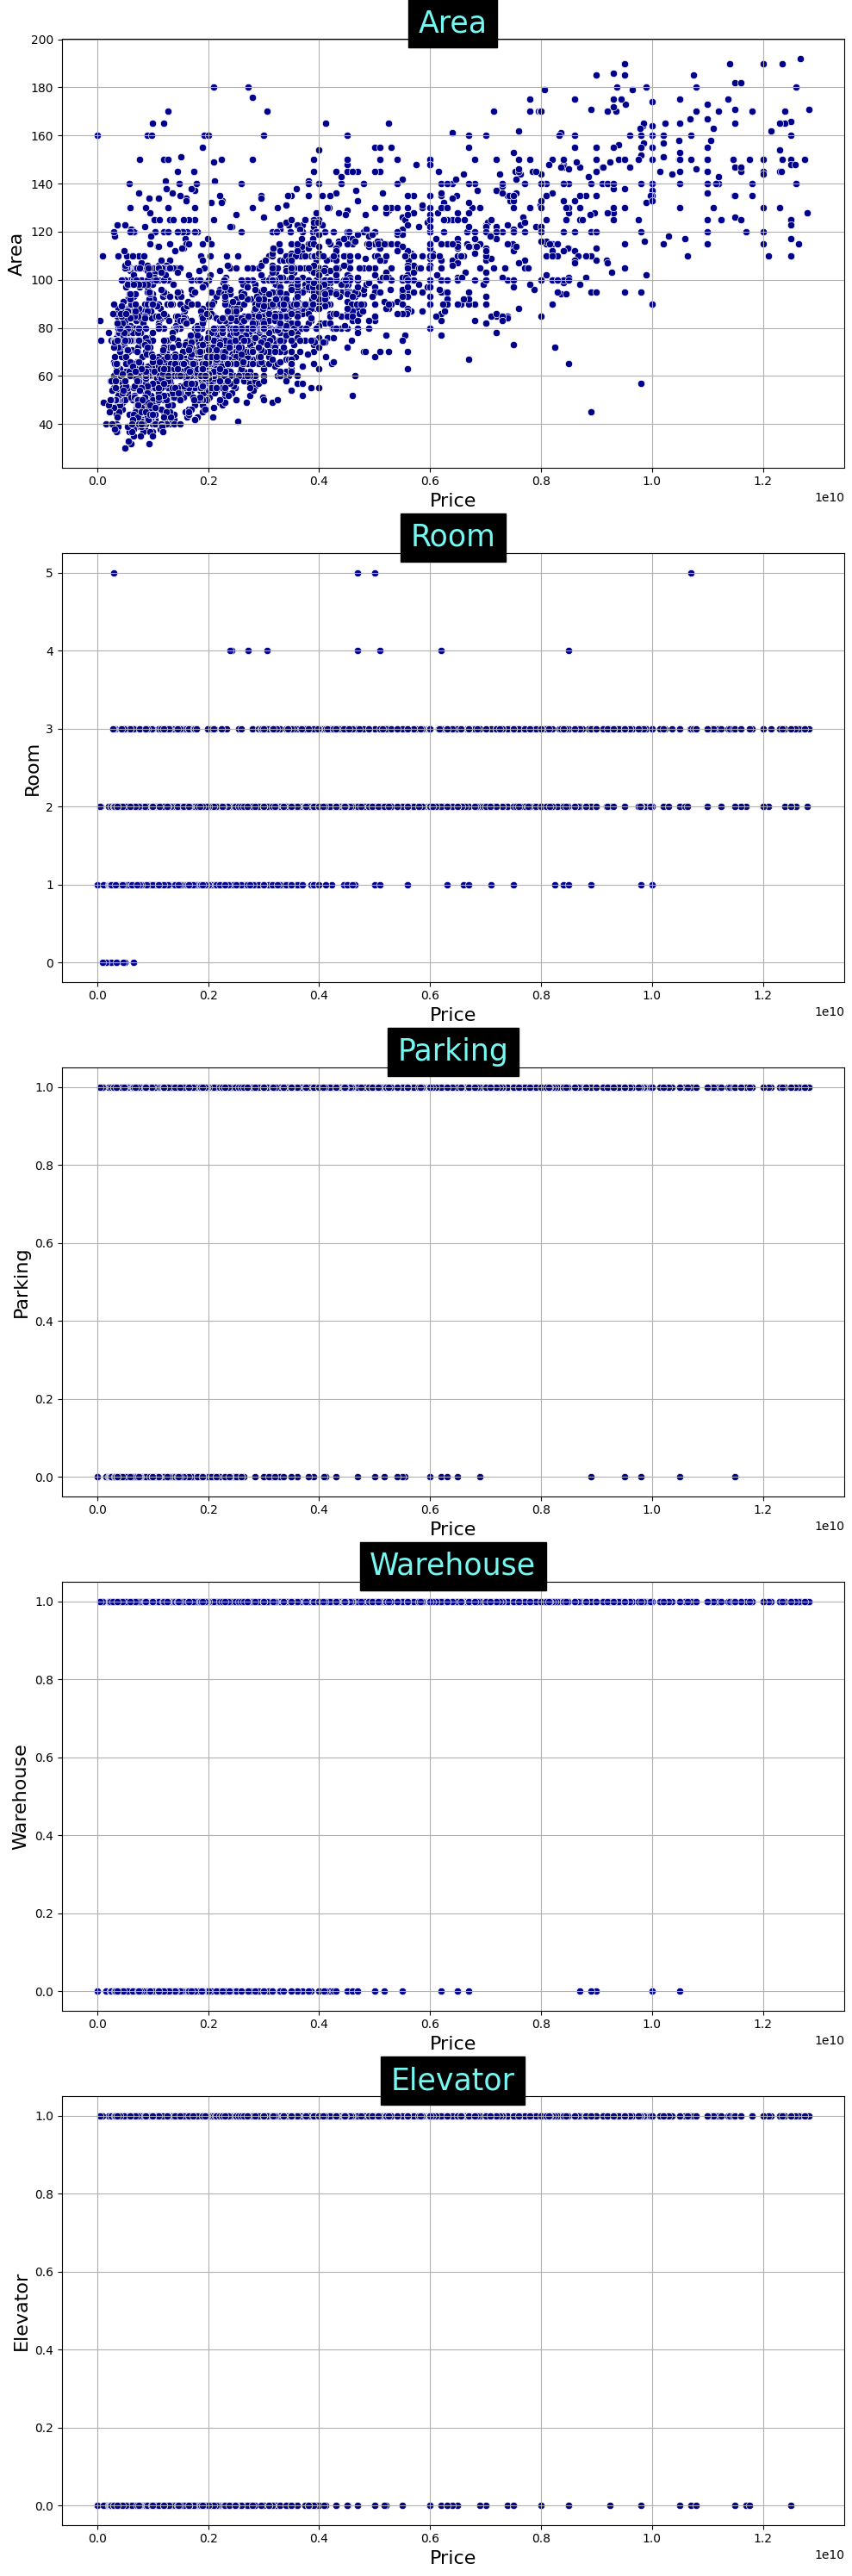

In [24]:
# Drowing scatter plot after remove outliers
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
sns.set_palette("PiYG")
plt.figure(figsize=(10,30))
for idx, column in enumerate(features):
    plt.subplot(5, 1,  idx + 1)
    sns.scatterplot(x = df['Price'], y=df[column] , data = df, color='darkblue')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('Price', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

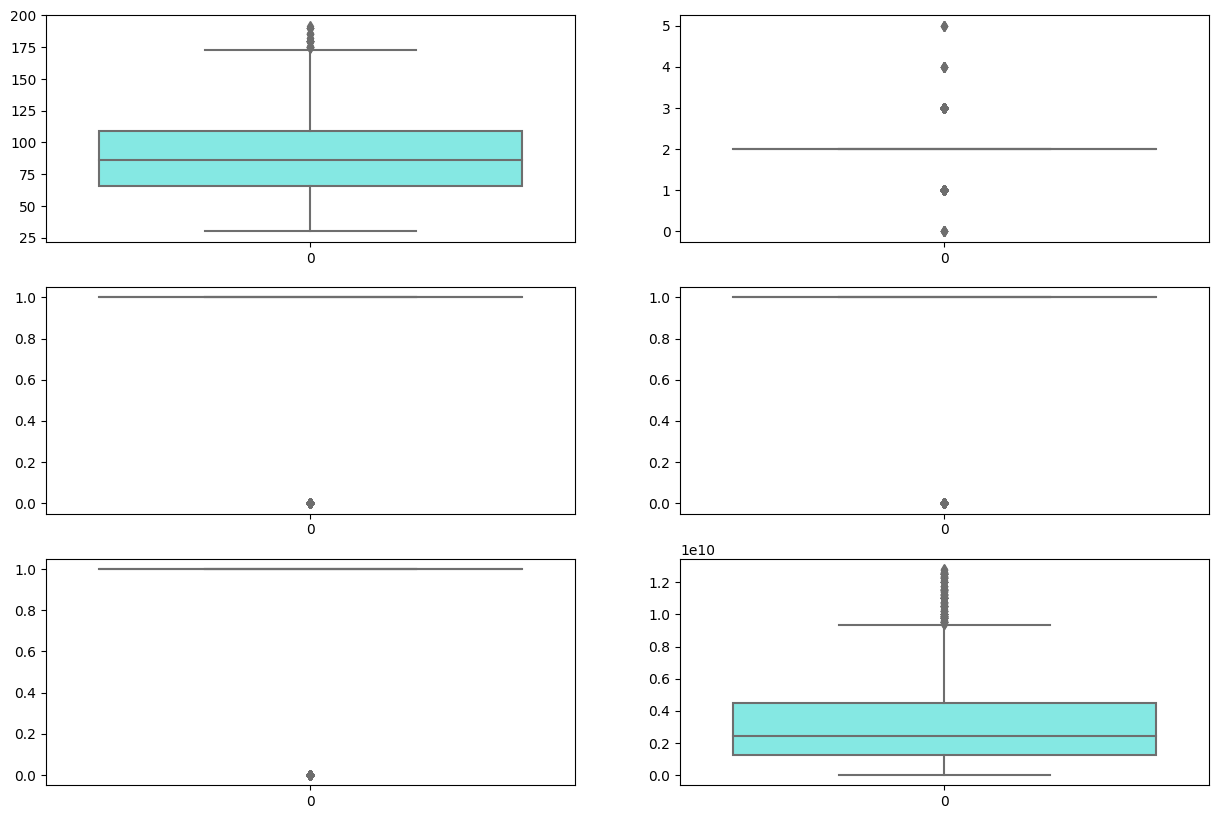

In [25]:
# Drowing subplot after remove outliers
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']
fig  = plt.subplots(nrows = 2, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(3,2,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">3. The Third Step | Prepering dataset(Train, Test) to using in Models </p>

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">3_1. Normalizing </p>

In [26]:
# Making a normalizer
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# fiting dataset on normalizer
normal = scaler.fit_transform(df)
# creating dataframe from normalized dataset
normal_df = pd.DataFrame(normal, columns= df.columns)

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">3_2. Examining the divisions of Test and Terin</p>

In [27]:
# creating X and y from normalized
X = pd.DataFrame(normal_df.drop(columns='Price'))
y = pd.DataFrame(normal_df.Price).values.reshape(-1, 1)

In [28]:
# X values
X

,Area,Room,Parking,Warehouse,Elevator,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,0.203704,0.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.185185,0.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.302469,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.401235,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.574074,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,0.345679,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,0.327160,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3109,0.277778,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3110,0.462963,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# y values
y

array([[0.14400923],
       [0.14400923],
       [0.04261625],
       ...,
       [0.02818725],
       [0.43648899],
       [0.02779728]])

In [30]:
# Creating X, y of train and test for using in Regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2489, 197)
shape of y train: (2489, 1)
shape of x test: (623, 197)
shape of y train: (623, 1)


<h2>How do we know which algorithm is better for training our dataset?</h2>

<p>In order to understand which model has the best score for our data set, before building the model with the desired algorithm, we need to have an overview of all the algorithms that are compatible with our data set. After choosing a few models, now it's time to change the parameters to get a higher score from the models</p>

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">4. The Forth Step | Using AutoML to find the best algorithms </p>

In [31]:
# install library of pycaret for autoML
!pip install --pre pycaret -q

# install library of autoviz 
!pip install autoviz -q

# update pip
!pip install --upgrade pip -q


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
beatrix-jupyterlab 2023.621.222118 requires jupyter-server~=1.16, but you have jupyter-server 2.6.0 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2023.8.1 which is incompatible.
dask-cuda 23.8.0 requires dask==2023.7.1, but you have dask 2023.8.1 which is incompatible.
dask-cudf 23.8.0 requires dask==2023.7.1, but you have dask 2023.8.1 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.
momepy 0.6.0 requires shapely>=2, but yo

In [32]:
# import pycaret
from pycaret.regression import *

In [33]:
# setup pycaret on dataframe  
setup(normal_df,target='Price', session_id=43)

,Description,Value
0,Session id,43
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3112, 198)"
4,Transformed data shape,"(3112, 198)"
5,Transformed train set shape,"(2178, 198)"
6,Transformed test set shape,"(934, 198)"
7,Numeric features,197
8,Preprocess,True
9,Imputation type,simple


In [34]:
# All models with which the dataset was trained
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [35]:
# Examining the score and errors of different models based on regression
# Best models are showen 
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0526,0.0071,0.0837,0.8544,0.0600,0.3179,1.8160
xgboost,Extreme Gradient Boosting,0.0529,0.0076,0.0867,0.8433,0.0616,0.3171,1.4870
br,Bayesian Ridge,0.0587,0.0081,0.0897,0.8339,0.0635,0.4153,0.1340
ridge,Ridge Regression,0.0592,0.0081,0.0900,0.8329,0.0639,0.4242,0.1080
huber,Huber Regressor,0.0569,0.0082,0.0904,0.8317,0.0634,0.3755,0.4070
et,Extra Trees Regressor,0.0595,0.0103,0.1012,0.7886,0.0726,0.3193,1.8200
rf,Random Forest Regressor,0.0611,0.0105,0.1019,0.7865,0.0731,0.3475,1.5870
knn,K Neighbors Regressor,0.0604,0.0105,0.1018,0.7857,0.0715,0.3110,0.1200
gbr,Gradient Boosting Regressor,0.0702,0.0108,0.1039,0.7788,0.0752,0.4819,0.7320
omp,Orthogonal Matching Pursuit,0.0761,0.0128,0.1129,0.7390,0.0808,0.5740,0.1140


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">4_1. Checking the best models for dataset</p>

In [36]:
# Showing score and error in different folder
best_model_1 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0507,0.0057,0.0753,0.8957,0.0537,0.2974
1,0.0548,0.0086,0.0928,0.7904,0.0688,0.3507
2,0.0525,0.0074,0.0861,0.8390,0.0628,0.3792
3,0.0595,0.0081,0.0899,0.8548,0.0613,0.2625
4,0.0575,0.0078,0.0881,0.8550,0.0619,0.2944
5,0.0506,0.0059,0.0766,0.8680,0.0555,0.3240
6,0.0539,0.0084,0.0914,0.7902,0.0674,0.3569
7,0.0473,0.0072,0.0848,0.8640,0.0596,0.3088
8,0.0446,0.0047,0.0683,0.9145,0.0487,0.2975


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
# Showing score and error in different folder
best_model_2 = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0474,0.0055,0.0740,0.8993,0.0525,0.2653
1,0.0564,0.0093,0.0965,0.7735,0.0703,0.3324
2,0.0549,0.0088,0.0936,0.8098,0.0675,0.4248
3,0.0605,0.0091,0.0956,0.8360,0.0646,0.2471
4,0.0577,0.0077,0.0880,0.8552,0.0622,0.2973
5,0.0503,0.0065,0.0807,0.8534,0.0572,0.3197
6,0.0524,0.0087,0.0935,0.7805,0.0692,0.3782
7,0.0480,0.0079,0.0890,0.8503,0.0614,0.3119
8,0.0472,0.0054,0.0733,0.9017,0.0521,0.3059


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
# Showing score and error in different folder
best_model_3 = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0600,0.0078,0.0885,0.8558,0.0608,0.4952
1,0.0607,0.0098,0.0989,0.7621,0.0729,0.4109
2,0.0562,0.0082,0.0904,0.8226,0.0653,0.4374
3,0.0648,0.0079,0.0887,0.8585,0.0615,0.3443
4,0.0573,0.0085,0.0920,0.8419,0.0628,0.3332
5,0.0579,0.0075,0.0863,0.8324,0.0610,0.4326
6,0.0576,0.0088,0.0937,0.7796,0.0677,0.4393
7,0.0520,0.0073,0.0856,0.8614,0.0613,0.4804
8,0.0552,0.0061,0.0781,0.8883,0.0549,0.3662


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
# Showing score and error in different folder
best_model_4 = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0601,0.0078,0.0882,0.8569,0.0608,0.4913
1,0.0607,0.0098,0.0989,0.7617,0.0731,0.4202
2,0.0562,0.0080,0.0895,0.8262,0.0653,0.4548
3,0.0658,0.0082,0.0907,0.8523,0.0625,0.3428
4,0.0584,0.0087,0.0934,0.8371,0.0637,0.3438
5,0.0580,0.0072,0.0849,0.8379,0.0602,0.4440
6,0.0589,0.0090,0.0946,0.7752,0.0690,0.4619
7,0.0526,0.0074,0.0859,0.8606,0.0609,0.4824
8,0.0554,0.0062,0.0789,0.8860,0.0557,0.3741


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
# Showing score and error in different folder
best_model_4 = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0540,0.0072,0.0849,0.8674,0.0577,0.4063
1,0.0604,0.0101,0.1003,0.7553,0.0729,0.3886
2,0.0549,0.0080,0.0893,0.8270,0.0642,0.3981
3,0.0628,0.0081,0.0902,0.8538,0.0616,0.3133
4,0.0564,0.0091,0.0956,0.8291,0.0648,0.3052
5,0.0570,0.0079,0.0888,0.8226,0.0620,0.3880
6,0.0537,0.0083,0.0909,0.7926,0.0654,0.3855
7,0.0515,0.0077,0.0876,0.8549,0.0616,0.4379
8,0.0538,0.0064,0.0801,0.8825,0.0561,0.3475


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">4_2. Checking by visualization</p>

In [41]:
# # Checking by autovisualization
# eda()

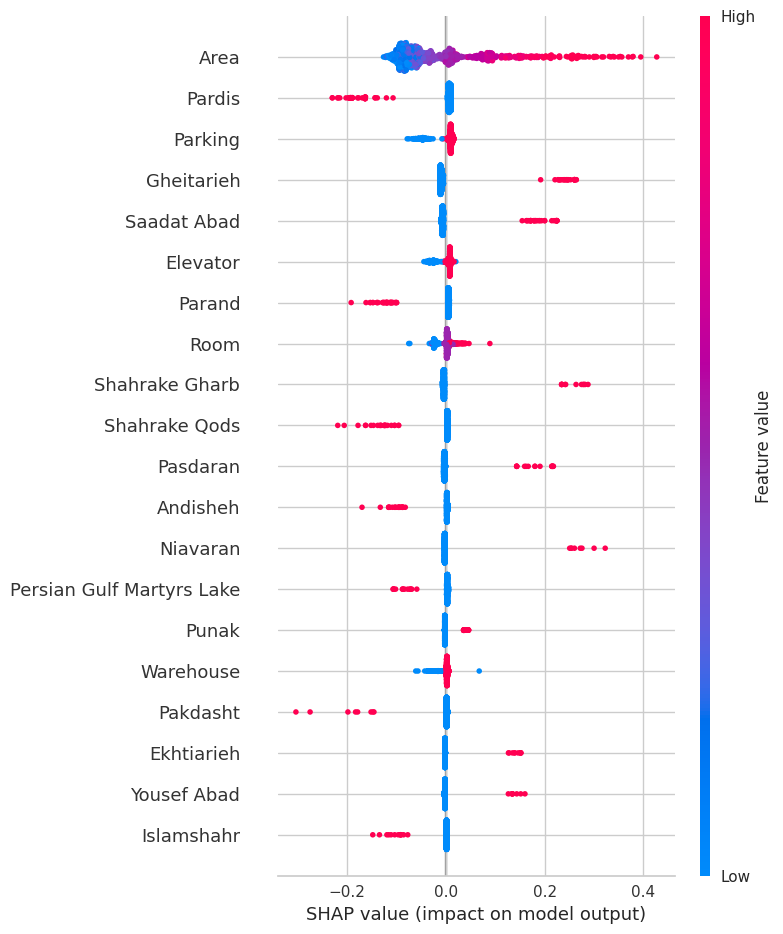

In [42]:
# Visualazetion tree base by SHAP
interpret_model(best_model_1)


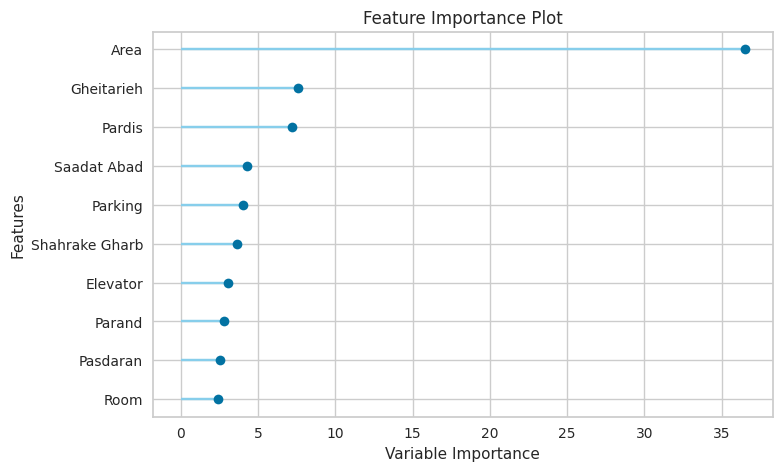

In [43]:
# finding important features
plot_model(estimator = best_model_1, plot='feature')

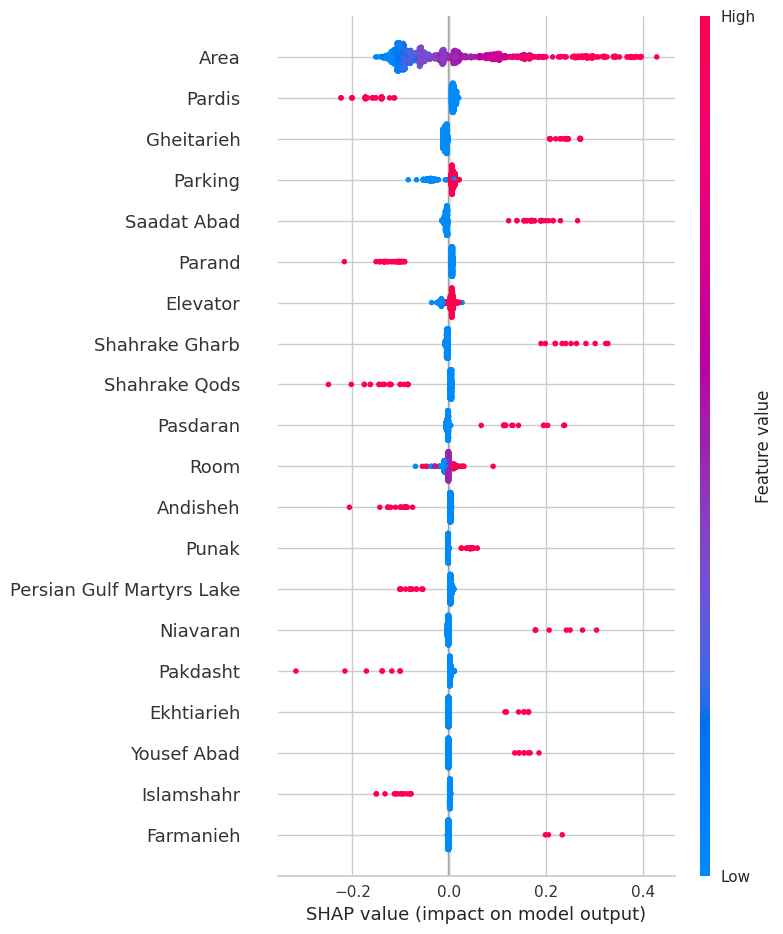

In [44]:
# Visualazetion tree base by SHAP
interpret_model(best_model_2)

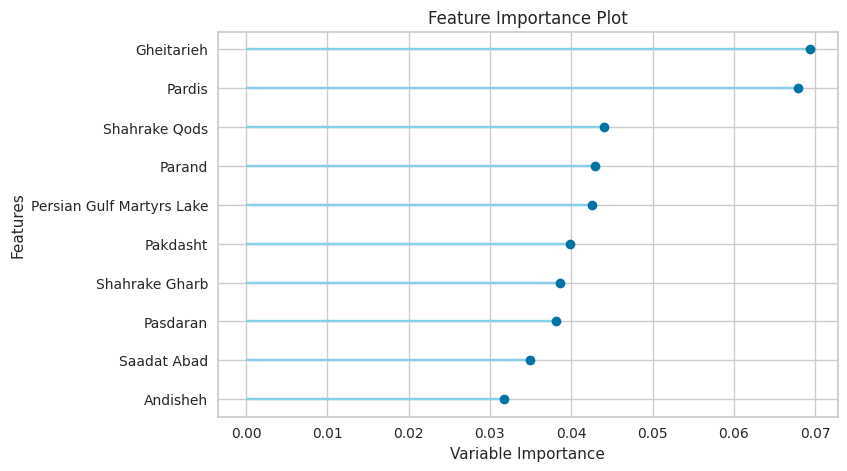

In [45]:
# finding important features
plot_model(estimator = best_model_2, plot='feature')

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">5. The fifth Step | Creating the best models that were shown by AutoML </p>

In [46]:
# Creating function to give the best parameter and hyperprameter
def parameter_finder (models, parameters):
    
    # Cheking time to peroces (start to end)
    start = time.time()
    
    # use grid for test the kind of model and its best parameter
    grid = GridSearchCV(models, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 43), 
                        n_jobs = -1)
    
    # fiting X and y train with models and parameters
    grid_fit = grid.fit(X_train, y_train)
    
    # peredict X_train with best model and best parameter
    y_train_pred = grid_fit.predict(X_train)
    
    # peredict X_train with best model and best parameter
    y_test_pred = grid_fit.predict(X_test)
    
    # Checking score and error of train and test
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Creat model name for show in the print
    model_name = str(models).split('(')[0]
    
    # Cheking time to peroces (start to end)
    end = time.time()
    
    # print all of score and error such as R2 score and RMSE
    # Show best parameter
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    
    # separator for greater readability
    print("**" * 12)
    
    # Show R2 scores
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    
    # show RMSE
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    
    # separator for greater readability
    print("**" * 12)
    
    #  Show runtime of all time that spebt for model
    print(f"Runtime of the program is: {end - start:0.3f}")
    
     # rerurn train, test score and error!  
    return train_score, test_score, RMSE

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_1. Cat Boost Regressor</p>

In [47]:
# # Creating CatBoostRegressor model customized with different parameters
# # Model of CatBoostRegressor
# catbreg = CatBoostRegressor()

# # parameters
# parameter_cbr = {'iterations': [100,200,300],
#              'learning_rate': [0.01, 0.1, 0.3],
#              'l2_leaf_reg': [1,4,7],
#              'depth': [1,3,5]}

In [48]:
# # Runing model on function that created for test model with several parameter to achieve best parameter
# catbreg_train_score, catbreg_test_score, catbreg_RMSE = parameter_finder(catbreg, parameter_cbr)

<h1>The best parameters for Cat Boost</h1>
<p>The best parameters for CatBoostRegressor model is: {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.3}</p>

In [49]:
# Model of CatBoostRegressor
catbreg = CatBoostRegressor(
    iterations=300,
    learning_rate=0.3,
    depth=3,
    l2_leaf_reg=1)

# fiting cat boost regressor on X and y train
cbr_model = catbreg.fit(X_train, y_train)

# predict y_train
y_train_pred = cbr_model.predict(X_train)

# predict y_test
y_test_pred = cbr_model.predict(X_test)

 # Checking score and error of train and test
cbr_train_score =cbr_model.score(X_train, y_train)
cbr_test_score = cbr_model.score(X_test, y_test)
cbr_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

# seperator
print('**'*12)


# Show R2 scores
print(f"(R2 score) in the training set is {cbr_train_score:0.2%} for CatBoostRegressor model.")
print(f"(R2 score) in the testing set is {cbr_test_score:0.2%} for CatBoostRegressor model.")

# show RMSE
print(f"RMSE is {cbr_RMSE:,} for CatBoostRegressor model.")

0:	learn: 0.1928839	total: 724us	remaining: 217ms
1:	learn: 0.1769626	total: 1.69ms	remaining: 252ms
2:	learn: 0.1632962	total: 2.39ms	remaining: 236ms
3:	learn: 0.1557090	total: 3.06ms	remaining: 226ms
4:	learn: 0.1485163	total: 3.86ms	remaining: 228ms
5:	learn: 0.1427540	total: 4.52ms	remaining: 221ms
6:	learn: 0.1380519	total: 5.17ms	remaining: 216ms
7:	learn: 0.1344111	total: 5.84ms	remaining: 213ms
8:	learn: 0.1310206	total: 6.45ms	remaining: 209ms
9:	learn: 0.1283471	total: 7.09ms	remaining: 206ms
10:	learn: 0.1261097	total: 7.71ms	remaining: 203ms
11:	learn: 0.1237677	total: 8.34ms	remaining: 200ms
12:	learn: 0.1215993	total: 8.98ms	remaining: 198ms
13:	learn: 0.1201250	total: 9.68ms	remaining: 198ms
14:	learn: 0.1186437	total: 10.3ms	remaining: 196ms
15:	learn: 0.1169992	total: 11ms	remaining: 195ms
16:	learn: 0.1154219	total: 11.7ms	remaining: 194ms
17:	learn: 0.1141518	total: 12.3ms	remaining: 193ms
18:	learn: 0.1130671	total: 13ms	remaining: 192ms
19:	learn: 0.1119459	total:

# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_2. X G Boost Regressor</p>

In [50]:
 # Creating XGBR model customized with different parameters
# Model of XGBoostRegressor
xgbreg = XGBRegressor()

# parameters
parameter_xgbr = {'n_estimators': [100, 300],
             'learning_rate': [0.01, 0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

In [51]:
# Runing model on function that created for test model with several parameter to achieve best parameter
xgbreg_train_score, xgbreg_test_score, xgbreg_RMSE = parameter_finder(xgbreg, parameter_xgbr)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75}
************************
(R2 score) in the training set is 89.89% for XGBRegressor model.
(R2 score) in the testing set is 84.15% for XGBRegressor model.
RMSE is 0.0880415761005491 for XGBRegressor model.
************************
Runtime of the program is: 129.862


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_3. Huber Regressor</p>

In [52]:
# Creating Huber Regressor model customized with different parameters
# Model of Huber Regressor
huber_regressor = HuberRegressor()

# parameters
parameter_huberreg = {'max_iter': [100,200,300],
             'alpha': [0.01, 0.05, 0.1],
             'epsilon': [1.05, 1.23, 1.45]}

In [53]:
# Runing model on function that created for test model with several parameter to achieve best parameter
huber_regressor_train_score, huber_regressor_test_score, huber_regressor_RMSE = parameter_finder(huber_regressor, parameter_huberreg)

The best parameters for HuberRegressor model is: {'alpha': 0.1, 'epsilon': 1.45, 'max_iter': 200}
************************
(R2 score) in the training set is 86.63% for HuberRegressor model.
(R2 score) in the testing set is 84.41% for HuberRegressor model.
RMSE is 0.08731794981440756 for HuberRegressor model.
************************
Runtime of the program is: 40.079


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_4. Ridge</p>

In [54]:
# Creating Ridge model customized with different parameters
# Model of Ridge
ridge = Ridge()

# parameters
parameter_ridge = {
             'alpha': [1, 2, 4, 6],
             'tol': [0.01, 0.05, 0.1]
}

In [55]:
# Runing model on function that created for test model with several parameter to achieve best parameter
ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, parameter_ridge)

The best parameters for Ridge model is: {'alpha': 1, 'tol': 0.01}
************************
(R2 score) in the training set is 86.75% for Ridge model.
(R2 score) in the testing set is 84.77% for Ridge model.
RMSE is 0.08630218798051442 for Ridge model.
************************
Runtime of the program is: 0.997


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_5. Bayesian Ridge</p>

In [56]:
# Creating Bayesian Ridge model customized with different parameters
# Model of Bayesian Ridge
bayesian_ridge = BayesianRidge()

# parameters
parameter_bayesianridge = {

             'tol': [0.001, 0.01, 0.05, 0.1, 0.2, 0,3]
}

In [57]:
# Runing model on function that created for test model with several parameter to achieve best parameter
bayesian_ridge_train_score, bayesian_ridge_test_score, bayesian_ridge_RMSE = parameter_finder(bayesian_ridge, parameter_bayesianridge)

The best parameters for BayesianRidge model is: {'tol': 3}
************************
(R2 score) in the training set is 87.23% for BayesianRidge model.
(R2 score) in the testing set is 84.72% for BayesianRidge model.
RMSE is 0.08644454187205725 for BayesianRidge model.
************************
Runtime of the program is: 1.823


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_6. Extra Trees Regressor</p>

In [58]:
 # Creating Extra Trees Regressor model customized with different parameters
# Model of ExtraTreesRegressor
etreg = ExtraTreesRegressor(random_state = 43, n_jobs = -1)

# parameters
parameter_etreg = {'n_estimators': [100,200,300,500],
             'max_depth': [3,4,5]
          }

In [59]:
# Runing model on function that created for test model with several parameter to achieve best parameter
etr_train_score, etr_test_score, etr_RMSE = parameter_finder(etreg, parameter_etreg)

The best parameters for ExtraTreesRegressor model is: {'max_depth': 5, 'n_estimators': 500}
************************
(R2 score) in the training set is 66.90% for ExtraTreesRegressor model.
(R2 score) in the testing set is 63.29% for ExtraTreesRegressor model.
RMSE is 0.13400810131904753 for ExtraTreesRegressor model.
************************
Runtime of the program is: 64.764


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_7. KNeighbors Regressor</p>

In [60]:
 # Creating K Neighbors Regressor model customized with different parameters
# Model of KNeighborsRegressor
knr = KNeighborsRegressor(n_jobs = -1)

# parameters
parameter_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}



In [61]:
# Runing model on function that created for test model with several parameter to achieve best parameter
knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, parameter_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 5, 'weights': 'distance'}
************************
(R2 score) in the training set is 98.30% for KNeighborsRegressor model.
(R2 score) in the testing set is 82.36% for KNeighborsRegressor model.
RMSE is 0.09290050750271132 for KNeighborsRegressor model.
************************
Runtime of the program is: 1.335


# <p style="background-color:black; font-family:calibri; color:#00FF00; font-size:120%; text-align:center; border-radius:30px 30px;">5_8. Random Forest Regressor</p>

In [62]:
# Creating Random Forest Regressor model customized with different parameters
# Model of RandomForestRegressor
rfr = RandomForestRegressor(random_state = 43)

# parameters
parameter_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3, 5],
            'n_estimators': [100, 300],
             'max_depth': [3,4,5]
                }


In [63]:
# Runing model on function that created for test model with several parameter to achieve best parameter
rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, parameter_rfr)

The best parameters for RandomForestRegressor model is: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
************************
(R2 score) in the training set is 68.09% for RandomForestRegressor model.
(R2 score) in the testing set is 63.21% for RandomForestRegressor model.
RMSE is 0.13415300863422921 for RandomForestRegressor model.
************************
Runtime of the program is: 348.920


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">6. The sixth Step | Check the models </p>

In [64]:
# Creating data frame from train, test, and rmse for visualization to see the best model
models_Train_test_rmse_score = pd.DataFrame({'Training Score': [cbr_train_score, xgbreg_train_score, huber_regressor_train_score, ridge_train_score, bayesian_ridge_train_score, etr_train_score, knr_train_score, rfr_train_score],
                             'Testing Score': [cbr_test_score, xgbreg_test_score, huber_regressor_test_score, ridge_test_score, bayesian_ridge_test_score, etr_test_score, knr_test_score, rfr_test_score],
                             'RMSE': [cbr_RMSE, xgbreg_RMSE, huber_regressor_RMSE, ridge_RMSE, bayesian_ridge_RMSE, etr_RMSE, knr_RMSE, rfr_RMSE]},
                             index = ['CatBoostRegressor', 'XGBRegressor', 'HuberRegressor','Ridge', 'BayesianRidge', 'ExtraTreesRegressor', 'KNeighborsRegressor', 'RandomForestRegressor'])

# showing dataframe
models_Train_test_rmse_score

,Training Score,Testing Score,RMSE
CatBoostRegressor,0.920173,0.872043,0.079112
XGBRegressor,0.898855,0.841527,0.088042
HuberRegressor,0.866294,0.844121,0.087318
Ridge,0.867459,0.847727,0.086302
BayesianRidge,0.872281,0.847224,0.086445
ExtraTreesRegressor,0.668951,0.632852,0.134008
KNeighborsRegressor,0.983047,0.823553,0.092901
RandomForestRegressor,0.680934,0.632057,0.134153


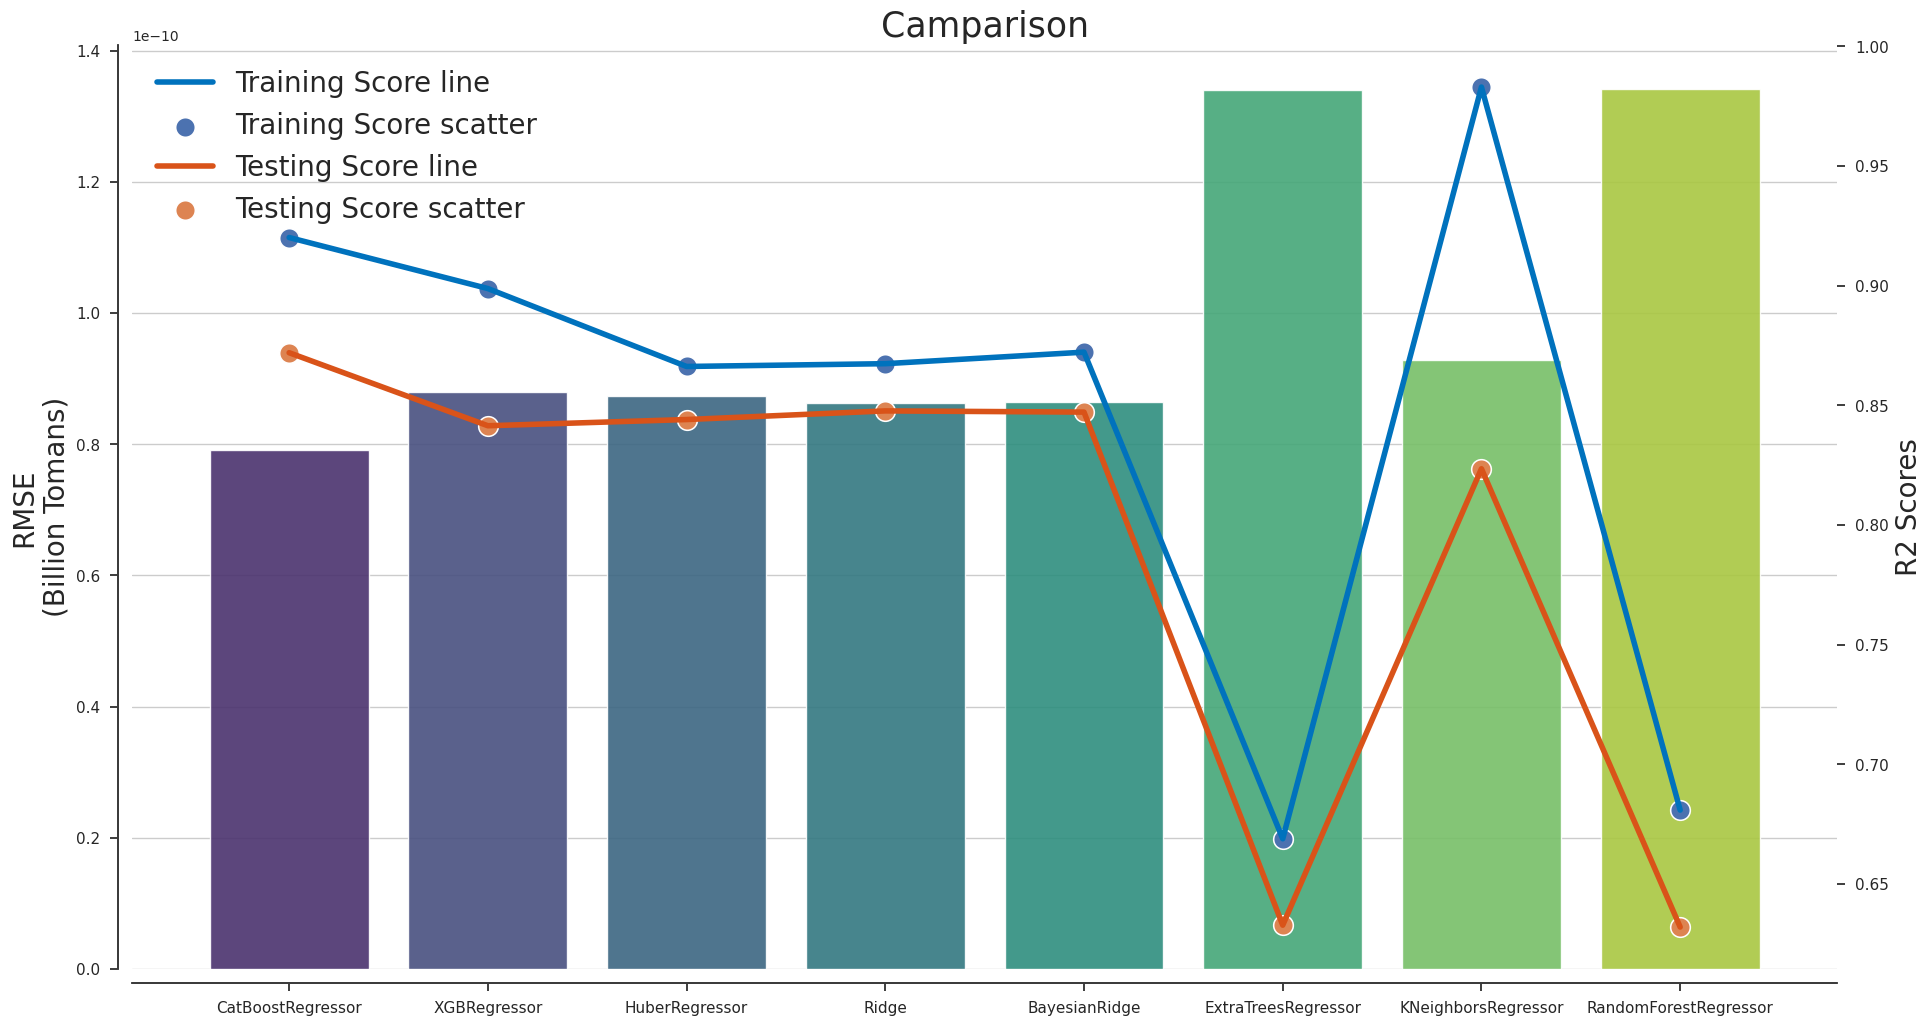

In [65]:
# subplot size
fig, ax = plt.subplots(figsize=(22,12))

# Style
sns.set(style='white')

# title
ax.set_title("Camparison", fontsize = 25)

# barplot
ax = sns.barplot(x = list(models_Train_test_rmse_score.index), y = models_Train_test_rmse_score['RMSE']/1000000000, alpha = 0.9, palette='viridis')

#label of y
ax.set_ylabel("RMSE\n(Billion Tomans)", fontsize = 20)

# twin
sec_ax = ax.twinx()

# Trian line plot
sec_ax = sns.lineplot(x = list(models_Train_test_rmse_score.index), y = models_Train_test_rmse_score['Training Score'], linewidth = 4, color = '#0072BD', label='Training Score line')
sec_ax = sns.scatterplot(x = list(models_Train_test_rmse_score.index), y = models_Train_test_rmse_score['Training Score'], s = 200, label='Training Score scatter')

# Test line plot
sec_ax = sns.lineplot(x = list(models_Train_test_rmse_score.index), y = models_Train_test_rmse_score['Testing Score'], linewidth = 4, color = '#D95319', label='Testing Score line')
sec_ax = sns.scatterplot(x = list(models_Train_test_rmse_score.index), y = models_Train_test_rmse_score['Testing Score'], s = 200, label='Testing Score scatter')

# label of y
sec_ax.set_ylabel("R2 Scores", fontsize = 20)

# legend
sec_ax.legend(fontsize = 20, loc='upper left')

# despine
sns.despine(offset = 10)

# show plots
plt.show()

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">7. The seventh Step | Saving the best models </p>

In [66]:
# Save all of Models

# Cat Boost Regressor model
joblib.dump(cbr_model, 'cat_boost_regressor') # 4

# XG Boost Regressor model
joblib.dump(xgbreg, 'x_g_boost_regressor') # 5

# Huber Regressor model
joblib.dump(huber_regressor, 'huber_regressor') # 1

# Ridge model
joblib.dump(ridge, 'ridge') # 2

# Bayesian Ridge model
joblib.dump(bayesian_ridge, 'bayesian_ridge') # 3

# # Extra Trees Regressor model
# joblib.dump(etreg, 'extra_trees_regressor')

# # K Neighbors Regressor model 
# joblib.dump(knr, 'k_neighbors_regressor')

# # Random Forest Regressor model
# joblib.dump(rfr, 'random_forest_regressor')

print('Done')

Done


</center>
<img style="border-radius: 200px 200px 200px 200px" src=https://static.vecteezy.com/system/resources/thumbnails/024/795/537/original/loop-thank-you-for-visiting-golden-light-motion-text-free-video.jpg height=500px width=900px border-radius=45%></center>